<a href="https://colab.research.google.com/github/Hitchiker-V/Breaking-NNs-and-Backprop/blob/Part-1/Andrej_Karpathy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# def f(x):
#   return 3*x**2 - 4*x + 5

In [ ]:
# f(3.0)

In [ ]:
# xs = np.arange(-5,5,0.25)
# ys = f(xs)
# plt.plot(xs, ys)

In [ ]:
# Visualizing operation through GraphWiz

from graphviz import Digraph

def trace(root):
  # building unique nodes and edges
  nodes, edges = set(), set()
  def build(v): # v denotes Value objects
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def node_id(n):
  return str(id(n))

def draw_dot(root):
  dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape = 'record')
    if n._op:
      # if node a result of some op, make an op node
      dot.node(name = uid + n._op, label = n._op)
      # connect op node to the prev node that was operated on
      dot.edge(uid + n._op, uid)
    
  for n1, n2 in edges:
      # connect n1 to op node of n2
      dot.edge(node_id(n1), node_id(n2) + n2._op)

  return dot

In [ ]:
#building micrograd's Value object and internal operators

# class Value:
#   def __init__(self, data):
#     self.data = data
  
#   def __repr__(self):
#     return f"Value(data={self.data})"
  
#   def __add__(self, other):
#     return Value(self.data + other.data)
  
#   def __mul__(self, other):
#     return Value(self.data*other.data)


# a = Value(3.0)
# b = Value(-7.5)
# c = Value(10.0)

# d = a*b + c

# To implement above function, we need any add operator to include previous operation results, hence making changes to above. Also keeping track of which variable resulted from which final operator
# class Value:
#   def __init__(self, data, _children = (), _op='', label =''):
#     self.data = data
#     self._prev = set(_children) # using set to optmize for efficiency
#     self._op = _op 
#     self.label = label
#   def __repr__(self):
#     return f"Value(data={self.data})"
  
#   def __add__(self, other):
#     return Value(self.data + other.data, (self, other), '+')
  
#   def __mul__(self, other):
#     return Value(self.data*other.data, (self, other), '*')
  
# a = Value(3.0, label = 'a')
# b = Value(-7.5, label = 'b')
# c = Value(10.0, label = 'c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'
# f = Value(-2.0, label = 'f')
# L = d*f; L.label = 'L'

In [ ]:
# Implementing gradient
# class Value:
#   def __init__(self, data, _children = (), _op='', label =''):
#     self.data = data
#     self.grad = 0 # At initial there is no impact on the variables when data changed
#     self._prev = set(_children) # using set to optmize for efficiency
#     ## definining backprop step
#     self._backward = lambda : None
#     self._op = _op 
#     self.label = label
#   def __repr__(self):
#     return f"Value(data={self.data})"
  
#   def __add__(self, other):
#     out = Value(self.data + other.data, (self, other), '+')

#     def _backward():
#       self.grad = 1.0*out.grad
#       other.grad = 1.0*out.grad
#     out._backward = _backward
    
#     return out
  
#   def __mul__(self, other):
#     out = Value(self.data*other.data, (self, other), '*')

#     def _backward():
#       self.grad = other.data * out.grad
#       other.grad = self.data * out.grad
#     out._backward = _backward

#     return out

#   # for activation function
#   def tanh(self):
#     n = self.data
#     t = (math.exp(2*n)-1)/(math.exp(2*n)+1)
#     out = Value(t, (self, ), 'tanh')

#     def _backward():
#       self.grad = (1-t**2) * out.grad
#     out._backward = _backward

#     return out

# a = Value(3.0, label = 'a')
# b = Value(-7.5, label = 'b')
# c = Value(10.0, label = 'c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'
# f = Value(-2.0, label = 'f')
# L = d*f; L.label = 'L'

In [ ]:
# draw_dot(L)
# grad visualizes the derivative of L wrt to L, f, d, e, c, b, a respectively

In [ ]:
# ## Implementing on a neuron

# x1 = Value(2.0, label = 'x1')
# x2 = Value(0.0, label = 'x2')
# w1 = Value(-3.0, label = 'w1')
# w2 = Value(1.0, label = 'w2')
# b = Value(6.8813735870195432, label = 'b')

# x1w1 = x1*w1; x1w1.label = 'x1w1'
# x2w2 = x2*w2; x2w2.label = 'x2w2'
# x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

# n = x1w1x2w2 + b; n.label = 'n'
# o = n.tanh(); o.label = 'o'
# draw_dot(o)


In [ ]:
# o.grad = 1.0

In [ ]:
# o._backward()

In [ ]:
# draw_dot(o)

In [ ]:
# n._backward()
# draw_dot(o)

In [ ]:
# x1w1x2w2._backward()
# draw_dot(o)

In [ ]:
# x1w1._backward()
# x2w2._backward()
# draw_dot(o)

In [ ]:
# To implement backprop, the propogation should travel from top to botton : Using Topological Sort for it

# o.grad = 1.0

# topo = [] # Empty array containing the nodes in right order
# visited = set() 
# def build_topo(v):
#   if v not in visited:
#    visited.add(v)
#    for child in v._prev:
#      build_topo(child)
#    topo.append(v)

# build_topo(o)
# topo

# ## Then implement _backward() method on this array sorted in topological order
# for node in reversed(topo):
#   node._backward()

# draw_dot(o)

In [ ]:
# Wrapping inside the value class itself

#Buggy Implementation
# class Value:
#   def __init__(self, data, _children = (), _op='', label =''):
#     self.data = data
#     self.grad = 0 # At initial there is no impact on the variables when data changed
#     self._prev = set(_children) # using set to optmize for efficiency
#     ## definining backprop step
#     self._backward = lambda : None
#     self._op = _op 
#     self.label = label
#   def __repr__(self):
#     return f"Value(data={self.data})"
  
#   def __add__(self, other):
#     out = Value(self.data + other.data, (self, other), '+')

#     def _backward():
#       self.grad = 1.0*out.grad
#       other.grad = 1.0*out.grad
#     out._backward = _backward
    
#     return out
  
#   def __mul__(self, other):
#     out = Value(self.data*other.data, (self, other), '*')

#     def _backward():
#       self.grad = other.data * out.grad
#       other.grad = self.data * out.grad
#     out._backward = _backward

#     return out

#   # for activation function
#   def tanh(self):
#     n = self.data
#     t = (math.exp(2*n)-1)/(math.exp(2*n)+1)
#     out = Value(t, (self, ), 'tanh')

#     def _backward():
#       self.grad = (1-t**2) * out.grad
#     out._backward = _backward

#     return out
  
#   def backward(self): #topologically sorted back prop
#     topo = [] # Empty array containing the nodes in right order
#     visited = set() 
#     def build_topo(v):
#       if v not in visited:
#         visited.add(v)
#       for child in v._prev:
#         build_topo(child)
#       topo.append(v)

#     build_topo(self)

#     self.grad = 1.0
#     ## Then implement _backward() method on this array sorted in topological order
#     for node in reversed(topo):
#       node._backward()

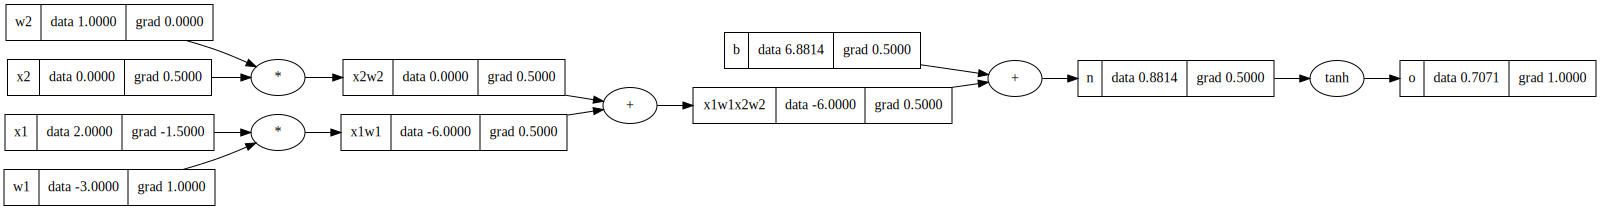

In [ ]:
## Implementing on a neuron

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

o.backward()
draw_dot(o)

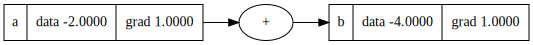

In [ ]:
# There is a bug in the above implementation:
# a = Value(-2.0) ; a.label = 'a'
# b = Value(3.0) ; b.label = 'b'
# d = a + b ; d.label = 'd'
# e = a + b ; e.label = 'e'
# f = d + e ; f.label = 'f'

# c = a+b ; c.label = 'c'
# d = a*b ; d.label = 'd'
# e = c * d ; e.label = 'e'
# draw_dot(e) 
# f.backward()
# draw_dot(f)

b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)
# Here a.grad should have been 2 but as in the backward(), we have self.grad = 1.0 + other.data, other.data = 1.0 + self.other
# If self.data and other.data are same variables as in this case, the grad doesn't get updated but rather replaced.

# Fix : Running summation of previous grads

In [ ]:
# Fixed implementation
class Value:
  def __init__(self, data, _children = (), _op='', label =''):
    self.data = data
    self.grad = 0 # At initial there is no impact on the variables when data changed
    self._prev = set(_children) # using set to optmize for efficiency
    ## definining backprop step
    self._backward = lambda : None
    self._op = _op 
    self.label = label
  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward = _backward
    
    return out
  
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  # for activation function
  def tanh(self):
    n = self.data
    t = (math.exp(2*n)-1)/(math.exp(2*n)+1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad = (1-t**2) * out.grad
    out._backward = _backward

    return out
  
  def backward(self): #topologically sorted back prop
    topo = [] # Empty array containing the nodes in right order
    visited = set() 
    def build_topo(v):
      if v not in visited:
        visited.add(v)
      for child in v._prev:
        build_topo(child)
      topo.append(v)

    build_topo(self)

    self.grad = 1.0
    ## Then implement _backward() method on this array sorted in topological order
    for node in reversed(topo):
      node._backward()

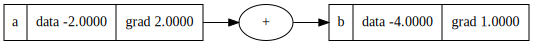

In [ ]:
# a = Value(-2.0, label = 'a')
# b = a + a ; b.label = 'b'
# b.backward()
# draw_dot(b)

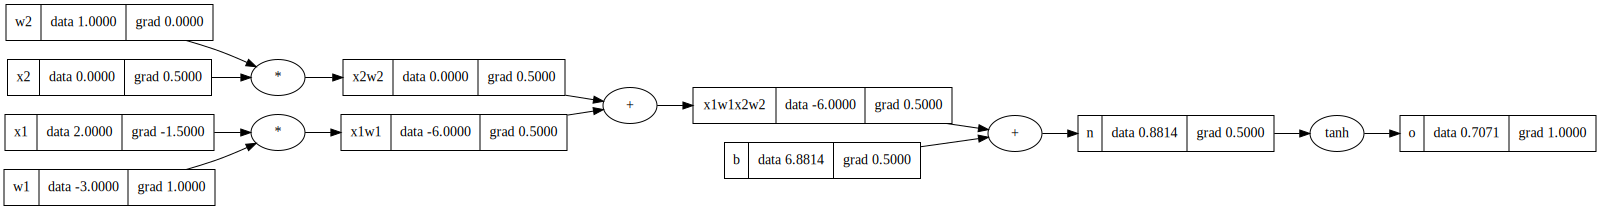

In [ ]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

o.backward()
draw_dot(o)